In [2]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

from pandas import read_csv
from sklearn.model_selection import train_test_split

In [6]:
dataset = read_csv("../datasets/mnist_data/train.csv").values
X_train, X_test, y_train, y_test = train_test_split(dataset[:,1:], dataset[:,0], 
                                                   test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [9]:
X_train, X_test = X_train/255, X_test/255
y_train, y_test = np_utils.to_categorical(y_train), np_utils.to_categorical(y_test) # OHV

In [21]:
inp = Input(shape=(784,))
fc1 = Dense(256, activation='sigmoid')(inp)
fc2 = Dense(64, activation='sigmoid')(fc1)
out = Dense(10, activation='softmax')(fc2)

model = Model(inputs=inp, outputs=out)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

In [31]:
hist = model.fit(X_train, y_train,
          shuffle=True,
          epochs=100,
          batch_size=128,
          validation_data=(X_test, y_test)
         )

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 1s 39us/step - loss: 0.6648 - acc: 0.8029 - val_loss: 0.6746 - val_acc: 0.8032
Epoch 2/100
33600/33600 [==============================] - 1s 41us/step - loss: 0.6596 - acc: 0.8038 - val_loss: 0.6694 - val_acc: 0.8040
Epoch 3/100
33600/33600 [==============================] - 1s 37us/step - loss: 0.6546 - acc: 0.8048 - val_loss: 0.6637 - val_acc: 0.8063
Epoch 4/100
33600/33600 [==============================] - 1s 36us/step - loss: 0.6496 - acc: 0.8071 - val_loss: 0.6599 - val_acc: 0.8056
Epoch 5/100
33600/33600 [==============================] - 1s 35us/step - loss: 0.6449 - acc: 0.8081 - val_loss: 0.6543 - val_acc: 0.8076
Epoch 6/100
33600/33600 [==============================] - 1s 36us/step - loss: 0.6401 - acc: 0.8095 - val_loss: 0.6518 - val_acc: 0.8094
Epoch 7/100
33600/33600 [==============================] - 1s 36us/step - loss: 0.6357 - acc: 0.8102 - val_loss: 0.6461 - v

33600/33600 [==============================] - 1s 37us/step - loss: 0.4908 - acc: 0.8559 - val_loss: 0.5067 - val_acc: 0.8551
Epoch 60/100
33600/33600 [==============================] - 1s 36us/step - loss: 0.4890 - acc: 0.8564 - val_loss: 0.5061 - val_acc: 0.8562
Epoch 61/100
33600/33600 [==============================] - 1s 39us/step - loss: 0.4873 - acc: 0.8575 - val_loss: 0.5040 - val_acc: 0.8550
Epoch 62/100
33600/33600 [==============================] - 1s 36us/step - loss: 0.4858 - acc: 0.8577 - val_loss: 0.5016 - val_acc: 0.8583
Epoch 63/100
33600/33600 [==============================] - 1s 37us/step - loss: 0.4839 - acc: 0.8583 - val_loss: 0.5011 - val_acc: 0.8561
Epoch 64/100
33600/33600 [==============================] - 1s 37us/step - loss: 0.4825 - acc: 0.8579 - val_loss: 0.4990 - val_acc: 0.8574
Epoch 65/100
33600/33600 [==============================] - 1s 40us/step - loss: 0.4808 - acc: 0.8592 - val_loss: 0.4973 - val_acc: 0.8581
Epoch 66/100
33600/33600 [==============

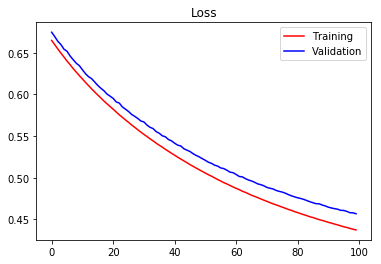

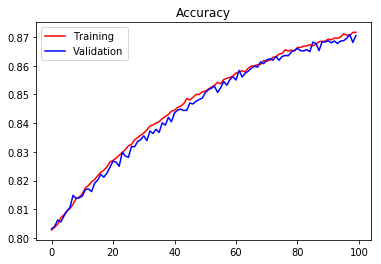

In [32]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training')
plt.plot(hist.history['val_loss'], 'b', label='Validation')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training')
plt.plot(hist.history['val_acc'], 'b', label='Validation')
plt.legend()
plt.show()